In [16]:
import matplotlib, pickle
import numpy as np
import matplotlib.pyplot as plt
from pystan import stan

matplotlib.style.use('ggplot')
%matplotlib inline

In [42]:
class transit():

    def __init__(self,num_samples,A,B,t_c,w,sigma):
        self.num_samples = num_samples
        self.A = A
        self.B = B
        self.t_c = t_c
        self.w = w
        self.sigma = sigma

    def generate_data(self):
        self.t_sample = np.arange(self.num_samples)
        self.data = np.zeros(self.num_samples)
        
        for i,t in enumerate(self.t_sample):
            if (t<self.t_c-self.w/2.) or (t>self.t_c+self.w/2.):
                self.data[i] = np.random.normal(self.A,self.sigma,1)
                
            else: 
                self.data[i] = np.random.normal(self.A-self.B,self.sigma,1)

        return self.t_sample, self.data

    def plot_data(self,file_name):
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111)
        ax.set_title('Mock transit data')
        ax.set_ylabel('Luminosity')
        ax.set_xlabel('Time')
        ax.scatter(self.t_sample, self.data)
        fig.savefig(file_name,bbox_inches='tight')
        return fig

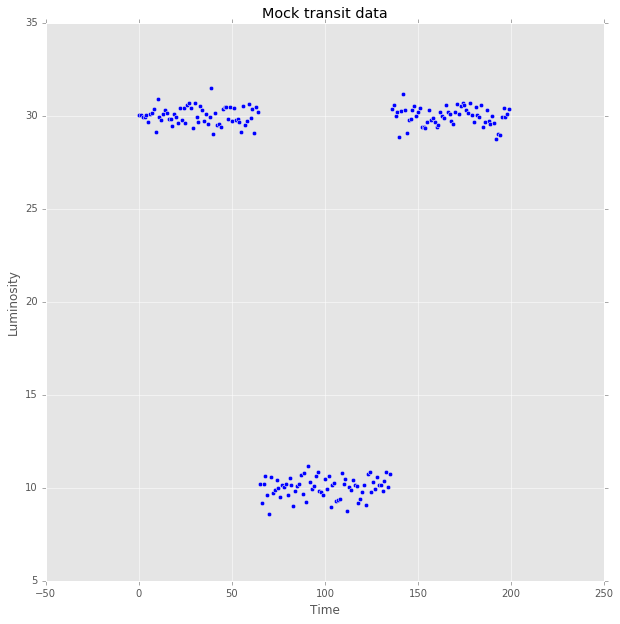

In [43]:
"""
num_samples : number of samples
A : amplitude of mean signal
A - b : amplitude of mean signal during transit
t_c : time of mid-transit
w : width of transit
sigma : spread of noise

"""

num_samples = 200
A = 30
B = 20
t_c = 100
w = 70
sigma = 0.5 

trans = transit(num_samples,A,B,t_c,w,sigma)
data = trans.generate_data()
np.savetxt('mock_transit_data.txt',np.c_[data[0],data[1]])
fig = trans.plot_data('mock_data_plot.png')

200
[   0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.
   12.   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.
   24.   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.
   36.   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.
   48.   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.
   60.   61.   62.   63.   64.   65.   66.   67.   68.   69.   70.   71.
   72.   73.   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.
   84.   85.   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.
   96.   97.   98.   99.  100.  101.  102.  103.  104.  105.  106.  107.
  108.  109.  110.  111.  112.  113.  114.  115.  116.  117.  118.  119.
  120.  121.  122.  123.  124.  125.  126.  127.  128.  129.  130.  131.
  132.  133.  134.  135.  136.  137.  138.  139.  140.  141.  142.  143.
  144.  145.  146.  147.  148.  149.  150.  151.  152.  153.  154.  155.
  156.  157.  158.  159.  160.  161.  162.  163

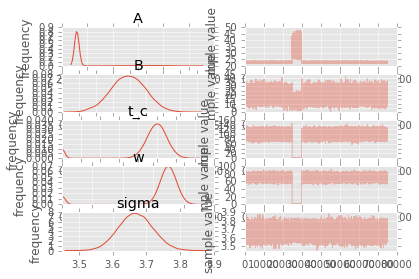

In [45]:
data = np.loadtxt('mock_transit_data.txt',unpack=True)

stan_data = {

    'N' : data[0].size,
    't' : data[0],
    'L' : data[1]

}

fit = stan(file='transit_model.stan', data=stan_data, iter=10000, chains=15)

results = fit.extract(permuted=True)

with open('fit_results.pickle', 'wb') as handle:
  pickle.dump(results, handle)

fit.plot()
plt.show()

In [46]:
print fit

Inference for Stan model: anon_model_20e3f08f5d4e3680d2dd7998db47693c.
15 chains, each with iter=10000; warmup=5000; thin=1; 
post-warmup draws per chain=5000, total post-warmup draws=75000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
A      23.83    1.24   3.52  22.43  22.77  22.95  23.15  38.04    8.0    3.8
B      19.62     0.6   5.14   9.39  16.11  19.63  23.16  29.57   74.0   1.06
t_c    93.37     8.9  26.71   0.16   91.4  99.16 106.23 119.47    9.0   2.79
w      65.37    6.37   18.0   0.39   65.7  69.53  73.09  79.75    8.0   3.77
sigma   3.67  4.6e-4   0.05   3.57   3.63   3.67    3.7   3.77  11997    1.0
lp__   -1439    13.9  39.32  -1587  -1430  -1429  -1428  -1427    8.0  24.23

Samples were drawn using NUTS(diag_e) at Sat Jul 16 09:41:15 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [ ]:
num_samples = 200
A = 30
B = 20
t_c = 100
w = 70
sigma = 0.5 
fit.plot(['w'])